#Lab Week 13
Please run the following code blocks one by one.

In [81]:
# get the music-genre-classification dataset
!git clone https://github.com/sergiooramas/music-genre-classification

fatal: destination path 'music-genre-classification' already exists and is not an empty directory.


In [2]:
# prepare the glove embeddings for the tutorial
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Before Lab and Assignment, make sure you've put the embedding lookup tables into `/content/gdrive/My Drive/music_data_mining/`.

- open the following urls
  - archive_glove.6B.50d.zip https://drive.google.com/file/d/1JfFF9o6Cmv2ek6r5FbKgOkMro8EykVlD/view?usp=share_link
  - archive_glove.6B.100d.zip https://drive.google.com/file/d/1VbXUDBlJ9106GBKisF9R-PivTSOnWEzZ/view?usp=share_link
- click the triangle with a plus ("Add shorcut to Drive") on the upper right corner
- navigate to the directory `/content/gdrive/My Drive/music_data_mining/` and confirm by clicking "Add shortcut here".

In [82]:
import numpy as np
from tensorflow import keras
import json

from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import Tokenizer

import pandas as pd
import matplotlib.pyplot as plt

# Load and process the dataset

In [83]:
# load the dataset
products = json.load(open("music-genre-classification/dataset_classification.json","r"))

In [5]:
# products is a dict of dicts
# a typical entry is shown below
products['B009XIFF5K']

{'char_length': 291,
 'all_text_pos': 'This_DT guy_NN is_VBZ a_DT genius_NN his_PRP$ arrangements posarrangements_NNS is_VBZ splendid_JJ I_PRP start_VB my_PRP$ day_NN with_IN his_PRP$ album_NN and_CC end posend_NN it_PRP with_IN samealways_NNS take_VB me_PRP to_TO a_DT calm_JJ and_CC comfortable_JJ place posplace_NN I_PRP love_NN mbandi posmbandi_NN .\nThis_DT cd_NN is_VBZ wonderful_JJ I_PRP purchased_VBN it_PRP about_IN 3_CD weeks_NNS ago_RB and_CC cannot_MD stop_VB listening_VBG to_TO it_PRP Mbandi_NNP is_VBZ such_JJ a_DT talented_JJ musician posmusician_NN ',
 'all_lemmas': 'this guy is a genius his arrangements posarrangement is splendid i start my day with his album and end posend it with samealways take me to a calm and comfortable place posplace i love mbandi posmbandi .\nthis cd is wonderful i purchased it about 3 week ago and cannot stop listening to it mbandi is such a talented musician posmusician ',
 'all_text_sentiment': 'This guy is a genius his arrangements posarrangemen

In [84]:
# extract reviews (data) and genre (labels)
reviews = []
labels_dict = {'Alternative Rock':0,'Classical':1,'Country':2,'Dance & Electronic':3,'Folk':4,'Jazz':5,'Latin Music':6,
               'Metal':7,'New Age':8,'Pop':9,'R&B':10,'Rap & Hip-Hop':11,'Rock':12}
labels = []

for values in products.values():
  for i in range(values['num_reviews']):
    reviews.append(values['reviews'][i]['text'])
    labels.append(labels_dict[values['genre']])

# what does a genre-review pair look like
for i in range(10):
  print(list(labels_dict.keys())[list(labels_dict.values()).index(labels[i])],
      f'({labels[i]})',
      ': ',
      reviews[i])

New Age (8) :  This guy is a genius! His arrangements is splendid. I start my day with his album and end it with samealways take me to a calm and comfortable place. I love MBandi !
New Age (8) :  This CD is wonderful.  I purchased it  about 3 weeks ago and CANNOT stop listening to it.  Mbandi is such a talented musician.
Rap & Hip-Hop (11) :  I remember when i first heard this track on the radio in 1998! No one else had heard it until summer of that year, but I did. I always wanted the instrumental to see where they got the sample from. Its from Towa Tei's Technova (La Em Copacabana) with Bibel Gilberto. When I listen to the original it really shows the skill that Tribe had in making it into a hip-hop classic. Then there is the radio version of Steppin' It Up to go along with Find A Way. Busta Rhymes and Redman always show there excellent talents on any beat they rap on.
Rap & Hip-Hop (11) :  This is one of the best underground hiphop albums to release in years. I can't think of any be

In [85]:
t = Tokenizer() # Instantiate the Tokenizer
t.fit_on_texts(reviews) # fit the Tokenizer on the reviews

labels = np.asarray(labels)

print(t.word_counts['the']) # The frequency of 'the': 18,265
print(t.word_counts['rap']) # The frequency of 'rap': 115
print(t.word_counts['alternative']) # The frequency of 'alternative': 18
print(t.document_count) # the number of reviews: 3116
print(t.word_index) # A dictionary of words and their uniquely assigned integers
print(t.word_docs) # Document frequency
print(len(t.word_index)) # the number of unique words in the corpus: 25,713

18265
115
18
3116
{'the': 1, 'and': 2, 'of': 3, 'a': 4, 'to': 5, 'is': 6, 'i': 7, 'this': 8, 'it': 9, 'in': 10, 'that': 11, 'on': 12, 'you': 13, 'with': 14, 'for': 15, 'album': 16, 'are': 17, 'as': 18, 'but': 19, 'music': 20, 'was': 21, 'cd': 22, 'have': 23, 'one': 24, 'quot': 25, 'my': 26, 'not': 27, 'from': 28, 'all': 29, 'like': 30, 'be': 31, 'songs': 32, 'if': 33, 'his': 34, 'by': 35, 'song': 36, 'great': 37, 'an': 38, 'so': 39, 'more': 40, 'just': 41, 'has': 42, 'they': 43, 'at': 44, 'me': 45, 'or': 46, "it's": 47, 'out': 48, 'their': 49, 'love': 50, 'some': 51, 'very': 52, 'her': 53, 'good': 54, 'he': 55, 'first': 56, 'there': 57, 'best': 58, 'time': 59, 'when': 60, 'can': 61, 'will': 62, 'sound': 63, 'which': 64, 'up': 65, 'what': 66, 'well': 67, 'other': 68, 'only': 69, 'your': 70, 'most': 71, 'would': 72, 'these': 73, 'no': 74, 'had': 75, 'really': 76, 'get': 77, 'about': 78, 'also': 79, 'than': 80, 'tracks': 81, 'who': 82, 'new': 83, 'track': 84, 'here': 85, 'much': 86, 'been

In [86]:
encoded_docs_bow = t.texts_to_matrix(reviews, mode='freq') # Normalized TF
encoded_docs_tfidf = t.texts_to_matrix(reviews, mode='tfidf') # TF-IDF

seq_docs = t.texts_to_sequences(reviews) # Transform each review in reviews in a sequence of integers
seq_docs_padded=keras.preprocessing.sequence.pad_sequences(seq_docs, maxlen=None, dtype='int32', padding='post', truncating='post', value=0) # Pads sequences to the same length

print(encoded_docs_bow.shape, encoded_docs_tfidf.shape) #(3116, 25714)
print(t.index_word[10]) # in
print(encoded_docs_bow[10,10]) # 0.01818181818181818
print(encoded_docs_tfidf[10,10]) # 0.9617162219143193

print(reviews[0])
print(seq_docs[0])

print(seq_docs_padded.shape) # (3116, 3232)
print(seq_docs_padded[0])    # [  8 616   6 ...   0   0   0]

(3116, 25714) (3116, 25714)
in
0.01818181818181818
0.9617162219143193
This guy is a genius! His arrangements is splendid. I start my day with his album and end it with samealways take me to a calm and comfortable place. I love MBandi !
[8, 616, 6, 4, 749, 34, 529, 6, 2421, 7, 448, 26, 243, 14, 34, 16, 2, 283, 9, 14, 12131, 220, 45, 5, 4, 1856, 2, 2981, 468, 7, 50, 8361]
(3116, 3232)
[  8 616   6 ...   0   0   0]


# Model #1. 
- Input: TF
- Algorithm: DNN

In [15]:
model = keras.models.Sequential([
  keras.layers.Dense(units=200, activation='elu', input_shape=(len(t.word_index)+1, )),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(units=200, activation='elu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(units=13, activation='softmax'),
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

history = model.fit(encoded_docs_bow, labels, batch_size=1000, epochs=200, validation_split=.1,
                    callbacks=[keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)])

Epoch 1/200
3/3 [==============================] - 1s 184ms/step - loss: 2.5635 - accuracy: 0.0934 - val_loss: 2.5566 - val_accuracy: 0.1571
Epoch 2/200
3/3 [==============================] - 0s 85ms/step - loss: 2.5559 - accuracy: 0.1166 - val_loss: 2.5469 - val_accuracy: 0.1571
Epoch 3/200
3/3 [==============================] - 0s 82ms/step - loss: 2.5485 - accuracy: 0.1163 - val_loss: 2.5373 - val_accuracy: 0.1571
Epoch 4/200
3/3 [==============================] - 0s 88ms/step - loss: 2.5429 - accuracy: 0.1163 - val_loss: 2.5289 - val_accuracy: 0.1571
Epoch 5/200
3/3 [==============================] - 0s 82ms/step - loss: 2.5365 - accuracy: 0.1163 - val_loss: 2.5226 - val_accuracy: 0.1571
Epoch 6/200
3/3 [==============================] - 0s 85ms/step - loss: 2.5292 - accuracy: 0.1163 - val_loss: 2.5183 - val_accuracy: 0.1571
Epoch 7/200
3/3 [==============================] - 0s 83ms/step - loss: 2.5238 - accuracy: 0.1163 - val_loss: 2.5149 - val_accuracy: 0.1571
Epoch 8/200
3/3 [==

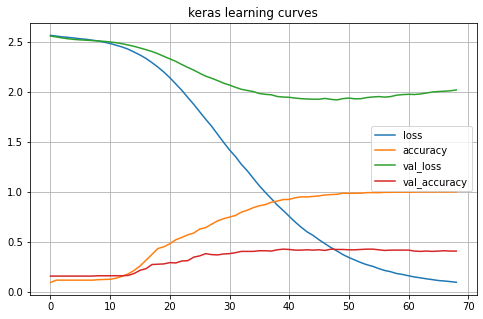

In [16]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

plt.title("keras learning curves")
plt.show()

# Model #2. 
- Input: TF-IDF
- Algorithm: DNN

In [17]:
model = keras.models.Sequential([
  # keras.layers.Dropout(0.5),
  keras.layers.Dense(units=200, activation='elu', input_shape=(len(t.word_index)+1, )),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(units=200, activation='elu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(units=13, activation='softmax'),
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

history = model.fit(encoded_docs_tfidf, labels, batch_size=1000, epochs=200, validation_split=.1,
                    callbacks=[keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)])
      #  

Epoch 1/200
3/3 [==============================] - 1s 182ms/step - loss: 2.6490 - accuracy: 0.1120 - val_loss: 2.3657 - val_accuracy: 0.2276
Epoch 2/200
3/3 [==============================] - 0s 83ms/step - loss: 1.7953 - accuracy: 0.4914 - val_loss: 2.1570 - val_accuracy: 0.3686
Epoch 3/200
3/3 [==============================] - 0s 85ms/step - loss: 1.2127 - accuracy: 0.7386 - val_loss: 2.0190 - val_accuracy: 0.3942
Epoch 4/200
3/3 [==============================] - 0s 88ms/step - loss: 0.7999 - accuracy: 0.8623 - val_loss: 1.9233 - val_accuracy: 0.4038
Epoch 5/200
3/3 [==============================] - 0s 84ms/step - loss: 0.4957 - accuracy: 0.9312 - val_loss: 1.8548 - val_accuracy: 0.4327
Epoch 6/200
3/3 [==============================] - 0s 82ms/step - loss: 0.3041 - accuracy: 0.9643 - val_loss: 1.8201 - val_accuracy: 0.4487
Epoch 7/200
3/3 [==============================] - 0s 77ms/step - loss: 0.1809 - accuracy: 0.9840 - val_loss: 1.8222 - val_accuracy: 0.4744
Epoch 8/200
3/3 [==

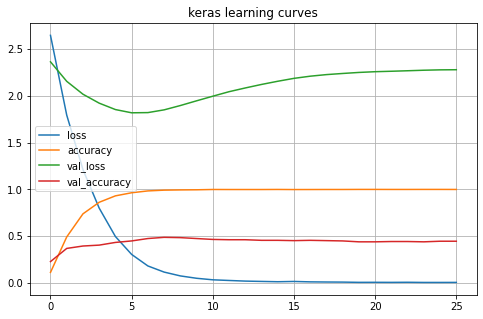

In [18]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

plt.title("keras learning curves")
plt.show()

# Model #3. 
- Input: Sequence, randomly initiated and **untrainable** embedding
- Algorithm: LSTM

In [69]:
model = keras.models.Sequential([
    keras.layers.Embedding(len(t.word_index)+1, 100, input_length=seq_docs_padded.shape[1], mask_zero=True, trainable=False),
    keras.layers.LSTM(100, dropout=.5, return_sequences=True),
    keras.layers.LayerNormalization(),
    keras.layers.LSTM(100, dropout=.2, return_sequences=False),
    keras.layers.LayerNormalization(),
    keras.layers.Dropout(.2),
    keras.layers.Dense(units=13, activation='softmax')
])


model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.Adam(learning_rate=0.001, clipvalue=0.01),
              metrics=["accuracy"])

history = model.fit(seq_docs_padded, labels, batch_size=500, epochs=200, validation_split=.1,
                    callbacks=[keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)])

Epoch 1/200
6/6 [==============================] - 13s 914ms/step - loss: 3.2162 - accuracy: 0.0838 - val_loss: 2.6425 - val_accuracy: 0.1026
Epoch 2/200
6/6 [==============================] - 3s 465ms/step - loss: 2.8245 - accuracy: 0.0906 - val_loss: 2.5625 - val_accuracy: 0.1506
Epoch 3/200
6/6 [==============================] - 3s 463ms/step - loss: 2.7332 - accuracy: 0.0884 - val_loss: 2.5272 - val_accuracy: 0.1538
Epoch 4/200
6/6 [==============================] - 3s 464ms/step - loss: 2.6980 - accuracy: 0.1020 - val_loss: 2.5357 - val_accuracy: 0.1122
Epoch 5/200
6/6 [==============================] - 3s 457ms/step - loss: 2.6758 - accuracy: 0.1056 - val_loss: 2.5084 - val_accuracy: 0.1603
Epoch 6/200
6/6 [==============================] - 3s 472ms/step - loss: 2.6285 - accuracy: 0.1134 - val_loss: 2.5295 - val_accuracy: 0.1538
Epoch 7/200
6/6 [==============================] - 3s 472ms/step - loss: 2.6227 - accuracy: 0.1131 - val_loss: 2.5190 - val_accuracy: 0.1314
Epoch 8/200


In [68]:
# notice, here the non-trainable params is 2,571,400
# why? the embedding layer is not trainable 
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 3232, 100)         2571400   
                                                                 
 lstm_11 (LSTM)              (None, 3232, 100)         80400     
                                                                 
 layer_normalization_8 (Laye  (None, 3232, 100)        200       
 rNormalization)                                                 
                                                                 
 lstm_12 (LSTM)              (None, 100)               80400     
                                                                 
 layer_normalization_9 (Laye  (None, 100)              200       
 rNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 100)              

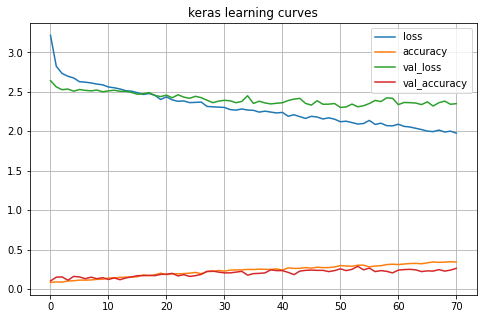

In [70]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

plt.title("keras learning curves")
plt.show()

# Model #4. 
- Input: Sequence, randomly initiated and **trainable** embedding
- Algorithm: LSTM

In [71]:
model = keras.models.Sequential([
    keras.layers.Embedding(len(t.word_index)+1, 100, input_length=seq_docs_padded.shape[1], mask_zero=True, trainable=True),
    keras.layers.LSTM(100, dropout=.5, return_sequences=True),
    keras.layers.LayerNormalization(),
    keras.layers.LSTM(100, dropout=.2, return_sequences=False),
    keras.layers.LayerNormalization(),
    keras.layers.Dropout(.2),
    keras.layers.Dense(units=13, activation='softmax')
])


model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.Adam(learning_rate=0.001, clipvalue=0.01),
              metrics=["accuracy"])

history = model.fit(seq_docs_padded, labels, batch_size=500, epochs=200, validation_split=.1,
                    callbacks=[keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)])

Epoch 1/200
6/6 [==============================] - 12s 959ms/step - loss: 3.2360 - accuracy: 0.0852 - val_loss: 2.6241 - val_accuracy: 0.1090
Epoch 2/200
6/6 [==============================] - 3s 505ms/step - loss: 2.6744 - accuracy: 0.1191 - val_loss: 2.5376 - val_accuracy: 0.1603
Epoch 3/200
6/6 [==============================] - 3s 509ms/step - loss: 2.5270 - accuracy: 0.1601 - val_loss: 2.5002 - val_accuracy: 0.1410
Epoch 4/200
6/6 [==============================] - 3s 509ms/step - loss: 2.3509 - accuracy: 0.2229 - val_loss: 2.6092 - val_accuracy: 0.1603
Epoch 5/200
6/6 [==============================] - 3s 565ms/step - loss: 2.0951 - accuracy: 0.3110 - val_loss: 2.6206 - val_accuracy: 0.1731
Epoch 6/200
6/6 [==============================] - 3s 487ms/step - loss: 1.8200 - accuracy: 0.4073 - val_loss: 2.6959 - val_accuracy: 0.1827
Epoch 7/200
6/6 [==============================] - 3s 503ms/step - loss: 1.5597 - accuracy: 0.4929 - val_loss: 2.7441 - val_accuracy: 0.2019
Epoch 8/200


In [72]:
# notice, here the non-trainable params is 0
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 3232, 100)         2571400   
                                                                 
 lstm_15 (LSTM)              (None, 3232, 100)         80400     
                                                                 
 layer_normalization_12 (Lay  (None, 3232, 100)        200       
 erNormalization)                                                
                                                                 
 lstm_16 (LSTM)              (None, 100)               80400     
                                                                 
 layer_normalization_13 (Lay  (None, 100)              200       
 erNormalization)                                                
                                                                 
 dropout_9 (Dropout)         (None, 100)              

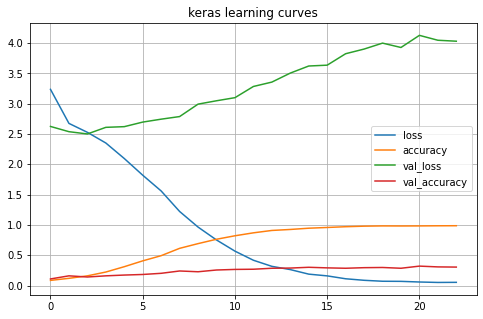

In [73]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

plt.title("keras learning curves")
plt.show()

# Model #5. 
- Input: Sequence, untrainable GloVe 50d
- Algorithm: LSTM

In [78]:
# unzip the embedding file
!unzip '/content/gdrive/My Drive/music_data_mining/archive_glove.6B.50d.zip'

Archive:  /content/gdrive/My Drive/music_data_mining/archive_glove.6B.50d.zip
  inflating: glove.6B.50d.txt        


In [75]:
# load GloVe 50-dim
glove50_embeddings_index = dict()
f = open('glove.6B.50d.txt')
for line in f:
	glove50_values = line.split()
	glove50_word = glove50_values[0]
	glove50_coefs = np.asarray(glove50_values[1:], dtype='float32')
	glove50_embeddings_index[glove50_word] = glove50_coefs
f.close()
print('Loaded %s word vectors.' % len(glove50_embeddings_index))

# create a weight matrix for words in training docs
glove50_embedding_matrix = np.zeros((len(t.word_index)+1, 50))
for word, i in t.word_index.items():
  glove50_embedding_vector = glove50_embeddings_index.get(word)
  if glove50_embedding_vector is not None:
    glove50_embedding_matrix[i] = glove50_embedding_vector


Loaded 400000 word vectors.


In [49]:
model = keras.models.Sequential([
    keras.layers.Embedding(len(t.word_index)+1, 50, weights=[glove50_embedding_matrix], input_length=seq_docs_padded.shape[1], trainable=False, mask_zero=True),                            
    keras.layers.LSTM(100, dropout=.5, return_sequences=False),
    keras.layers.Dropout(.2),
    keras.layers.Dense(units=13, activation='softmax')
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.Adam(learning_rate=0.001, clipvalue=0.01),
              metrics=["accuracy"])

history = model.fit(seq_docs_padded, labels, batch_size=100, epochs=200, validation_split=.1,
                    callbacks=[keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)])

Epoch 1/200
29/29 [==============================] - 9s 105ms/step - loss: 2.5583 - accuracy: 0.1098 - val_loss: 2.5160 - val_accuracy: 0.1603
Epoch 2/200
29/29 [==============================] - 2s 62ms/step - loss: 2.5109 - accuracy: 0.1398 - val_loss: 2.4784 - val_accuracy: 0.1859
Epoch 3/200
29/29 [==============================] - 2s 60ms/step - loss: 2.4299 - accuracy: 0.1673 - val_loss: 2.3479 - val_accuracy: 0.2051
Epoch 4/200
29/29 [==============================] - 2s 63ms/step - loss: 2.3356 - accuracy: 0.2179 - val_loss: 2.3390 - val_accuracy: 0.2147
Epoch 5/200
29/29 [==============================] - 2s 59ms/step - loss: 2.2517 - accuracy: 0.2482 - val_loss: 2.3407 - val_accuracy: 0.2147
Epoch 6/200
29/29 [==============================] - 2s 60ms/step - loss: 2.2127 - accuracy: 0.2607 - val_loss: 2.3245 - val_accuracy: 0.2436
Epoch 7/200
29/29 [==============================] - 2s 59ms/step - loss: 2.1850 - accuracy: 0.2693 - val_loss: 2.2795 - val_accuracy: 0.2276
Epoch

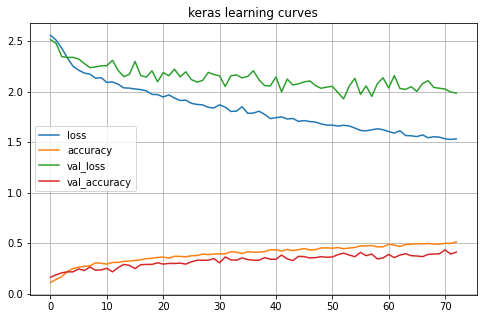

In [50]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

plt.title("keras learning curves")
plt.show()

# Model #6. 
- Input: Sequence, untrainable GloVe 100d
- Algorithm: LSTM

In [51]:
# unzip the embedding file
!unzip '/content/gdrive/My Drive/music_data_mining/archive_glove.6B.100d.zip'

Archive:  /content/gdrive/My Drive/music_data_mining/archive_glove.6B.100d.zip
  inflating: glove.6B.100d.txt       


In [52]:
# GloVe 100-dim
glove100_embeddings_index = dict()
f = open('glove.6B.100d.txt')
for line in f:
	glove100_values = line.split()
	glove100_word = glove100_values[0]
	glove100_coefs = np.asarray(glove100_values[1:], dtype='float32')
	glove100_embeddings_index[glove100_word] = glove100_coefs
f.close()
print('Loaded %s word vectors.' % len(glove100_embeddings_index))

# create a weight matrix for words in training docs
glove100_embedding_matrix = np.zeros((len(t.word_index)+1, 100))
for word, i in t.word_index.items():
  glove100_embedding_vector = glove100_embeddings_index.get(word)
  if glove100_embedding_vector is not None:
    glove100_embedding_matrix[i] = glove100_embedding_vector

Loaded 400000 word vectors.


In [53]:
model = keras.models.Sequential([
    keras.layers.Embedding(len(t.word_index)+1, 100, weights=[glove100_embedding_matrix], input_length=seq_docs_padded.shape[1], trainable=False, mask_zero=True),                            
    keras.layers.LSTM(100, dropout=.5, return_sequences=False),
    keras.layers.Dropout(.2),
    keras.layers.Dense(units=13, activation='softmax')
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.Adam(learning_rate=0.001, clipvalue=0.01),
              metrics=["accuracy"])

history = model.fit(seq_docs_padded, labels, batch_size=100, epochs=200, validation_split=.1,
                    callbacks=[keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)])
      #  

Epoch 1/200
29/29 [==============================] - 7s 112ms/step - loss: 2.5630 - accuracy: 0.1070 - val_loss: 2.4974 - val_accuracy: 0.1763
Epoch 2/200
29/29 [==============================] - 2s 65ms/step - loss: 2.5138 - accuracy: 0.1362 - val_loss: 2.4871 - val_accuracy: 0.1827
Epoch 3/200
29/29 [==============================] - 2s 64ms/step - loss: 2.4600 - accuracy: 0.1530 - val_loss: 2.5468 - val_accuracy: 0.1635
Epoch 4/200
29/29 [==============================] - 2s 63ms/step - loss: 2.4083 - accuracy: 0.1805 - val_loss: 2.5599 - val_accuracy: 0.1763
Epoch 5/200
29/29 [==============================] - 2s 66ms/step - loss: 2.3536 - accuracy: 0.2033 - val_loss: 2.4822 - val_accuracy: 0.1410
Epoch 6/200
29/29 [==============================] - 2s 69ms/step - loss: 2.2999 - accuracy: 0.2208 - val_loss: 2.3270 - val_accuracy: 0.2083
Epoch 7/200
29/29 [==============================] - 2s 65ms/step - loss: 2.2414 - accuracy: 0.2397 - val_loss: 2.5465 - val_accuracy: 0.1442
Epoch

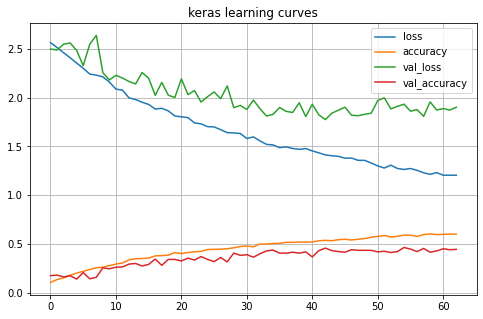

In [54]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

plt.title("keras learning curves")
plt.show()

# Model #7. 
- Input: Sequence, **trainable** GloVe 100d
- Algorithm: LSTM

In [79]:
model = keras.models.Sequential([
    keras.layers.Embedding(len(t.word_index)+1, 100, weights=[glove100_embedding_matrix], input_length=seq_docs_padded.shape[1], trainable=True, mask_zero=True),                            
    keras.layers.LSTM(100, dropout=.5, return_sequences=False),
    keras.layers.Dropout(.2),
    keras.layers.Dense(units=13, activation='softmax')
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.Adam(learning_rate=0.001, clipvalue=0.01),
              metrics=["accuracy"])

history = model.fit(seq_docs_padded, labels, batch_size=100, epochs=200, validation_split=.1,
                    callbacks=[keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)])

Epoch 1/200
29/29 [==============================] - 10s 120ms/step - loss: 2.5772 - accuracy: 0.1056 - val_loss: 2.5292 - val_accuracy: 0.1538
Epoch 2/200
29/29 [==============================] - 2s 75ms/step - loss: 2.5167 - accuracy: 0.1416 - val_loss: 2.4988 - val_accuracy: 0.1699
Epoch 3/200
29/29 [==============================] - 2s 72ms/step - loss: 2.4682 - accuracy: 0.1705 - val_loss: 2.4563 - val_accuracy: 0.1827
Epoch 4/200
29/29 [==============================] - 2s 73ms/step - loss: 2.3380 - accuracy: 0.2147 - val_loss: 2.4001 - val_accuracy: 0.2019
Epoch 5/200
29/29 [==============================] - 2s 79ms/step - loss: 2.2003 - accuracy: 0.2710 - val_loss: 2.3163 - val_accuracy: 0.2500
Epoch 6/200
29/29 [==============================] - 2s 76ms/step - loss: 2.1100 - accuracy: 0.3014 - val_loss: 2.2287 - val_accuracy: 0.2692
Epoch 7/200
29/29 [==============================] - 2s 74ms/step - loss: 2.0013 - accuracy: 0.3263 - val_loss: 2.2410 - val_accuracy: 0.2372
Epoc

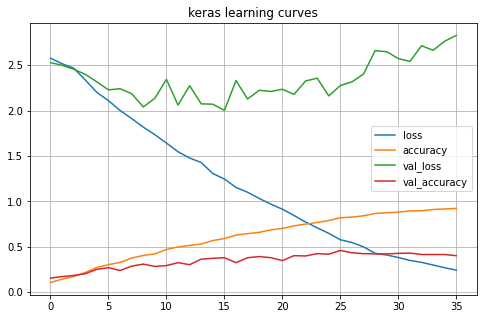

In [80]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

plt.title("keras learning curves")
plt.show()

# Model #7. 
- Input: TF-IDF
- Algorithm: SVM

In [70]:
from sklearn.linear_model import SGDClassifier
import numpy as np
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=0.01,
                        max_iter=100, tol=-np.infty, random_state=42)
sgd_clf.fit(encoded_docs_tfidf, labels)


SGDClassifier(alpha=0.01, eta0=0.001, learning_rate='constant', max_iter=100,
              random_state=42, tol=-inf)

In [71]:
from sklearn.metrics import accuracy_score
y_pred = sgd_clf.predict(encoded_docs_tfidf)
accuracy_score(labels, y_pred)

1.0

In [72]:
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(encoded_docs_tfidf, labels, test_size=0.1, random_state=42)

In [73]:
from sklearn.linear_model import SGDClassifier
import numpy as np
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=0.01,
                        max_iter=100, tol=-np.infty, random_state=42)
sgd_clf.fit(a_train, b_train)

from sklearn.metrics import accuracy_score
y_pred = sgd_clf.predict(a_test)
accuracy_score(b_test, y_pred)

0.5352564102564102

# Model #8. 
- Input: Sequence
- Algorithm: BERT

In [87]:
# install two libraries
# ktrain is a lightweight wrapper for the deep learning library TensorFlow Keras (and other libraries) to help build, train, and deploy neural networks and other machine learning models.
# https://pypi.org/project/ktrain/
!pip3 install ktrain
# ELI5 is a Python package which helps to debug machine learning classifiers and explain their predictions.
# https://pypi.org/project/eli5/
!pip3 install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
import ktrain
from ktrain import text

In [100]:
# API `texts_from_array()` refers to https://amaiya.github.io/ktrain/text/index.html#ktrain.text.texts_from_array
(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=reviews[:-300], y_train=labels[:-300],
                                                                       x_test=reviews[-300:], y_test=labels[-300:],
                                                                       class_names=list(labels_dict),
                                                                       preprocess_mode='bert',
                                                                       maxlen=350,  # we are using only the first 350 tokens of each review
                                                                       max_features=35000
                                                                       )

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


task: text classification


In [103]:
# API `text_classifier()` refers to https://amaiya.github.io/ktrain/text/index.html#ktrain.text.text_classifier
model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)
# API `get_learner()` refers to https://amaiya.github.io/ktrain/index.html#ktrain.get_learner
learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_test, y_test), batch_size=8)

Is Multi-Label? False
maxlen is 350
done.


In [104]:
# API `fit_onecycle()` refers to https://amaiya.github.io/ktrain/core.html#ktrain.core.Learner.fit_onecycle
learner.fit_onecycle(lr=2e-5, epochs=3)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/3
352/352 [==============================] - 299s 741ms/step - loss: 2.2325 - accuracy: 0.2862 - val_loss: 1.4396 - val_accuracy: 0.5667
Epoch 2/3
352/352 [==============================] - 257s 729ms/step - loss: 1.2623 - accuracy: 0.6214 - val_loss: 1.2880 - val_accuracy: 0.5700
Epoch 3/3
352/352 [==============================] - 257s 731ms/step - loss: 0.6749 - accuracy: 0.8011 - val_loss: 1.2506 - val_accuracy: 0.6100


In [105]:
learner.validate(val_data=(x_test, y_test), class_names=list(labels_dict))

10/10 [==============================] - 12s 838ms/step
                    precision    recall  f1-score   support

  Alternative Rock       0.55      0.62      0.58        26
         Classical       0.76      0.95      0.84        20
           Country       0.93      0.74      0.82        19
Dance & Electronic       0.50      0.54      0.52        35
              Folk       0.55      0.50      0.52        22
              Jazz       0.76      0.62      0.68        21
       Latin Music       0.77      0.88      0.82        26
             Metal       0.54      0.58      0.56        12
           New Age       0.47      0.35      0.40        20
               Pop       0.59      0.80      0.68        41
               R&B       0.60      0.35      0.44        17
     Rap & Hip-Hop       0.77      0.67      0.71        15
              Rock       0.26      0.19      0.22        26

          accuracy                           0.61       300
         macro avg       0.62      0.60   

array([[16,  0,  1,  4,  0,  0,  0,  1,  1,  1,  0,  1,  1],
       [ 0, 19,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0, 14,  1,  0,  0,  0,  0,  0,  3,  1,  0,  0],
       [ 5,  0,  0, 19,  0,  0,  3,  0,  3,  3,  1,  1,  0],
       [ 0,  2,  0,  0, 11,  0,  0,  0,  1,  4,  1,  0,  3],
       [ 0,  1,  0,  1,  1, 13,  0,  0,  1,  1,  0,  0,  3],
       [ 0,  0,  0,  1,  0,  2, 23,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  2,  0,  0,  0,  7,  0,  0,  0,  0,  2],
       [ 1,  2,  0,  0,  5,  0,  0,  1,  7,  2,  0,  0,  2],
       [ 0,  1,  0,  2,  1,  0,  1,  0,  1, 33,  0,  0,  2],
       [ 2,  0,  0,  1,  1,  1,  0,  0,  0,  4,  6,  1,  1],
       [ 0,  0,  0,  2,  0,  0,  0,  2,  0,  1,  0, 10,  0],
       [ 4,  0,  0,  5,  1,  1,  3,  2,  1,  3,  1,  0,  5]])

In [106]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [107]:
reviews[2]
labels[2]

11

In [108]:
# We should not have blind faith in what the model spits out. We want explanations.
# the `explain()` function uses green for favorable features and red for unfavourable features
# API `explain()` refers to https://amaiya.github.io/ktrain/text/predictor.html#ktrain.text.predictor.TextPredictor.explain
# it uses LIME under the hood, check out https://towardsdatascience.com/lime-explain-machine-learning-predictions-af8f18189bfe for more details
predictor.explain(reviews[2], all_targets=True)

79/79 [==============================] - 72s 910ms/step


In [83]:
reviews[8]
#labels[8]

'This album is full of many catchy songs and is one of my favorite albums released this year.  I became familiar with this group through the alternative channel on XM radio, initially through the song &#34;Kangaroo Court&#34;.  Other great songs are &#34;safe and sound&#34; and &#34;i sold my bed and not my stereo&#34;.'

In [84]:
predictor.explain(reviews[8], all_targets=True)

79/79 [==============================] - 69s 876ms/step
